**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 1](#toc1_)    
  - [Summarized Table of Contents](#toc1_1_)    
  - [Before Starting](#toc1_2_)    
  - [Introduction](#toc1_3_)    
  - [**1. Data Preparation**](#toc1_4_)    
  - [**1.1 Load data**](#toc1_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_1_1_1_)    
    - [**1.2 Save data**](#toc1_5_2_)    
    - [**1.3 Exploratory data analysis (EDA)**](#toc1_5_3_)    
  - [**2. Feature engineering**](#toc1_6_)    
    - [Using Bag of Words](#toc1_6_1_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_6_1_1_1_)    
  - [**3. Model**](#toc1_7_)    
    - [**3.1 Decision Trees**](#toc1_7_1_)    
  - [**4. Results Evaluation**](#toc1_8_)    
        - [**>>> Exercise 3 (Take home):**](#toc1_8_1_1_1_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_8_1_1_2_)    
        - [**>>> Exercise 5 (Take home):**](#toc1_8_1_1_3_)    
  - [**5. Other things you can try**](#toc1_9_)    
  - [**6. Deep Learning**](#toc1_10_)    
    - [**6.1 Prepare data (X, y)**](#toc1_10_1_)    
    - [**6.2 Deal with categorical label (y)**](#toc1_10_2_)    
    - [**6.3 Build model**](#toc1_10_3_)    
    - [**6.4 Train**](#toc1_10_4_)    
    - [**6.5 Predict on testing data**](#toc1_10_5_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_10_5_1_1_)    
    - [Note](#toc1_10_6_)    
    - [More Information for your reference](#toc1_10_7_)    
  - [**7. Word2Vector**](#toc1_11_)    
    - [**7.1 Prepare training corpus**](#toc1_11_1_)    
    - [**7.2 Training our model**](#toc1_11_2_)    
    - [**7.3 Generating word vector (embeddings)**](#toc1_11_3_)    
    - [**7.4 Using a pre-trained w2v model**](#toc1_11_4_)    
      - [(1) Download model by yourself](#toc1_11_4_1_)    
      - [(2) Using gensim api](#toc1_11_4_2_)    
    - [**7.5 king + woman - man = ?**](#toc1_11_5_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_11_5_1_1_)    
  - [**8. Clustering: k-means**](#toc1_12_)    
      - [Basic concept](#toc1_12_1_1_)    
  - [**9. High-dimension Visualization: t-SNE and UMAP**](#toc1_13_)    
    - [**9.1 Prepare visualizing target**](#toc1_13_1_)    
    - [**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc1_13_2_)    
        - [**>>> Exercise 8 (Take home):**](#toc1_13_2_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [115]:
 # test code for environment setup
 # import library
import dotenv 
from google import genai 
import langextract 
import gensim 
import tensorflow 
import tensorflow_hub 
import keras 
import ollama 
import langchain 
from langchain_community import utils 
from langchain_core import prompts 
from langchain_google_genai import chat_models 
from bs4 import BeautifulSoup 
import chromadb 
import gradio 
import jupyter 
import sklearn 
import pandas 
import numpy 
import matplotlib 
import plotly 
import seaborn 
import nltk 
import umap 
import pymupdf 
%matplotlib inline 
print("gensim: " + gensim.__version__) 
print("tensorflow: " + tensorflow.__version__) 
print("keras: " + keras.__version__)

gensim: 4.3.3
tensorflow: 2.20.0
keras: 3.11.3


# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 1](#toc0_)
In this lab's phase 1 session we will focus on the use of Neural Word Embeddings

## <a id='toc1_1_'></a>[Summarized Table of Contents](#toc0_)
- **Phase 1:**
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization


## <a id='toc1_2_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_3_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

---
## <a id='toc1_4_'></a>[**1. Data Preparation**](#toc0_)

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

---
## <a id='toc1_5_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [116]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [117]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [118]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [119]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [120]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
##### <a id='toc1_5_1_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


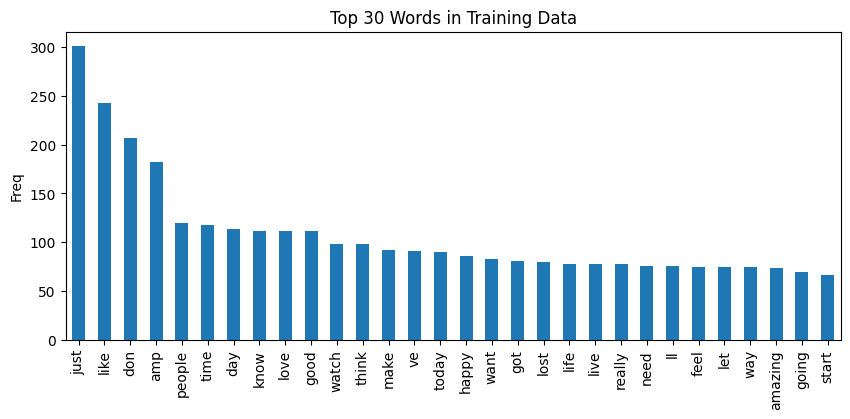

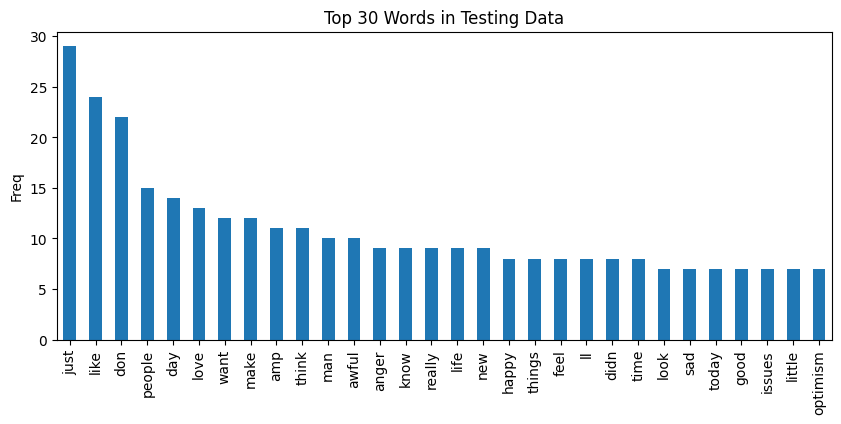

In [123]:
# Answer here
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
train_counts = vectorizer.fit_transform(train_df["text"])
test_counts  = vectorizer.transform(test_df["text"])

#Top 30 frequent words
train_freq = pd.Series(train_counts.toarray().sum(axis=0), index=vectorizer.get_feature_names_out()).sort_values(ascending=False).head(30)
test_freq  = pd.Series(test_counts.toarray().sum(axis=0),  index=vectorizer.get_feature_names_out()).sort_values(ascending=False).head(30)

#plot 
plt.figure(figsize=(10,4))
train_freq.plot(kind='bar')
plt.title("Top 30 Words in Training Data")
plt.ylabel("Freq")
plt.show()

plt.figure(figsize=(10,4))
test_freq.plot(kind='bar')
plt.title("Top 30 Words in Testing Data")
plt.ylabel("Freq")
plt.show()


In [124]:
# 
'''
I use CountVectorizer with English stopwords removed to focus on meaningful words. 
Without removing stopwords like the, is, and and, the vocabulary became very large (around 17000 words) and the most frequent terms were just common words. 
After removing them, we get smoother and more relevant Top 30 frequent words.
'''

'\nI use CountVectorizer with English stopwords removed to focus on meaningful words. \nWithout removing stopwords like the, is, and and, the vocabulary became very large (around 17000 words) and the most frequent terms were just common words. \nAfter removing them, we get smoother and more relevant Top 30 frequent words.\n'

---
### <a id='toc1_5_2_'></a>[**1.2 Save data**](#toc0_)

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [125]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [126]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### <a id='toc1_5_3_'></a>[**1.3 Exploratory data analysis (EDA)**](#toc0_)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [127]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

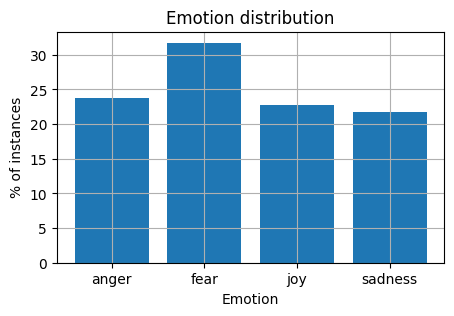

In [128]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## <a id='toc1_6_'></a>[**2. Feature engineering**](#toc0_)
### <a id='toc1_6_1_'></a>[Using Bag of Words](#toc0_)
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [129]:
from sklearn.feature_extraction.text import CountVectorizer

In [130]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [131]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [132]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [133]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [134]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [135]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [136]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [137]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [138]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

(3613, 500)

In [139]:
train_data_BOW_features_500.toarray()

array([[0, 2, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [140]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [141]:
"😂" in feature_names_500

True

---
##### <a id='toc1_6_1_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [142]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
TFIDF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# Fit and transform training data
TFIDF_1000.fit(train_df['text'])
train_data_TFIDF_features = TFIDF_1000.transform(train_df['text'])

#check dimension
train_data_TFIDF_features.shape

# Observe feature names from 100:110
feature_names_TFIDF = TFIDF_1000.get_feature_names_out()
feature_names_TFIDF[100:110]

array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

---
## <a id='toc1_7_'></a>[**3. Model**](#toc0_)
### <a id='toc1_7_1_'></a>[**3.1 Decision Trees**](#toc0_)
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [143]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [144]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['joy', 'fear', 'anger', 'anger', 'joy', 'fear', 'fear', 'anger',
       'fear', 'fear'], dtype=object)

---
## <a id='toc1_8_'></a>[**4. Results Evaluation**](#toc0_)

Now we will check the results of our model's performance

In [145]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [146]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [147]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [148]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

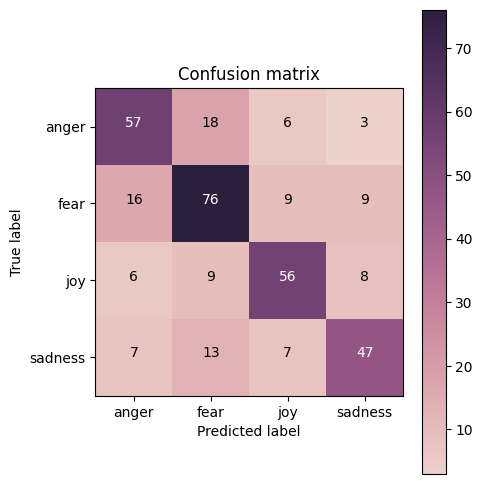

In [149]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
##### <a id='toc1_8_1_1_1_'></a>[**>>> Exercise 3 (Take home):**](#toc0_)
Can you interpret the results above? What do they mean?

In [150]:
# Answer here
'''
The Decision Tree model shows a training accuracy of 0.99 and a testing accuracy of 0.68, 
which indicates overfitting.The model has learned the training data too well but fails to generalize to unseen examples.

From the confusion matrix, we can see that while the model performs reasonably well across categories, 
there is noticeable confusion between similar emotions, such as fear and sadness, which often share similar vocabulary and tone.
'''

'\nThe Decision Tree model shows a training accuracy of 0.99 and a testing accuracy of 0.68, \nwhich indicates overfitting.The model has learned the training data too well but fails to generalize to unseen examples.\n\nFrom the confusion matrix, we can see that while the model performs reasonably well across categories, \nthere is noticeable confusion between similar emotions, such as fear and sadness, which often share similar vocabulary and tone.\n'

---
##### <a id='toc1_8_1_1_2_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [151]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Train and test
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)
y_test_pred_nb = NB_model.predict(X_test)

# accuracy
acc_test_nb = accuracy_score(y_test, y_test_pred_nb)
print("Testing Accuracy:", round(acc_test_nb, 2))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_nb))

Testing Accuracy: 0.7

Classification Report:
               precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



---
##### <a id='toc1_11_5_1_1_'></a>[**>>> Exercise 5 (Take home):**](#toc0_)
How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [152]:
# Answer here
'''
Naive Bayes performs better on unseen data (0.7 vs 0.68 test accuracy),
-showing better generalization than Decision Tree.
-This happens because Naive Bayes assumes feature independence and works well with text data (word counts).
-In text classification, Naive Bayes often outperforms Decision Trees for sparse, high-dimensional data.
'''

'\nNaive Bayes performs better on unseen data (0.7 vs 0.68 test accuracy),\n-showing better generalization than Decision Tree.\n-This happens because Naive Bayes assumes feature independence and works well with text data (word counts).\n-In text classification, Naive Bayes often outperforms Decision Trees for sparse, high-dimensional data.\n'

---

## <a id='toc1_9_'></a>[**5. Other things you can try**](#toc0_)

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

In [153]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create PCA transformer like reducing 50
pca = PCA(n_components=50, random_state=42)

# Applying PCA to Bag-of-Words data
X_train_pca = pca.fit_transform(X_train.toarray())
X_test_pca = pca.transform(X_test.toarray())

#train decision tree on reduced data 
DT_pca = DecisionTreeClassifier(random_state=42)
DT_pca.fit(X_train_pca, y_train)

#prediction
y_pred_pca = DT_pca.predict(X_test_pca)

print("Accuracy with PCA-reduced features:", accuracy_score(y_test, y_pred_pca))
print("\nClassification Report:\n", classification_report(y_test, y_pred_pca))

Accuracy with PCA-reduced features: 0.23054755043227665

Classification Report:
               precision    recall  f1-score   support

       anger       0.14      0.12      0.13        84
        fear       0.33      0.34      0.33       110
         joy       0.23      0.19      0.21        79
     sadness       0.18      0.24      0.21        74

    accuracy                           0.23       347
   macro avg       0.22      0.22      0.22       347
weighted avg       0.23      0.23      0.23       347



In [154]:
#
'''i tried PCA to check how it reduces the number of features drastically '''

'i tried PCA to check how it reduces the number of features drastically '

---
## <a id='toc1_10_'></a>[**6. Deep Learning**](#toc0_)

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](./pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


---
### <a id='toc1_10_1_'></a>[**6.1 Prepare data (X, y)**](#toc0_)

In [155]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [156]:
import keras

In [157]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

---
### <a id='toc1_10_2_'></a>[**6.2 Deal with categorical label (y)**](#toc0_)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [158]:
# deal with label (string -> one-hot)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 3503    sadness
2139        joy
1273       fear
1908       fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


In [159]:
y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)




## After convert
y_train[0:4]:
 [[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


---
### <a id='toc1_10_3_'></a>[**6.3 Build model**](#toc0_)

In [160]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](./pics/pic2.png)

In [161]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │          32,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_5 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_2 (Softmax)                  │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

---
### <a id='toc1_10_4_'></a>[**6.4 Train**](#toc0_)

In [162]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3775 - loss: 1.3282 - val_accuracy: 0.4553 - val_loss: 1.2899
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6424 - loss: 1.0096 - val_accuracy: 0.6571 - val_loss: 0.9417
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7946 - loss: 0.5858 - val_accuracy: 0.7118 - val_loss: 0.7845
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8516 - loss: 0.4101 - val_accuracy: 0.7089 - val_loss: 0.8187
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8887 - loss: 0.3142 - val_accuracy: 0.6916 - val_loss: 0.8269
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9123 - loss: 0.2549 - val_accuracy: 0.7003 - val_loss: 0.8799
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9316 - loss: 0.2119 - val_accuracy: 0.6916 - val_loss: 0.9537
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9446 - loss: 0.1760 - val_accuracy: 0.

---
### <a id='toc1_10_5_'></a>[**6.5 Predict on testing data**](#toc0_)

In [163]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000013E9A04ECA0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[4.1222624e-03, 3.0902552e-03, 9.9108583e-01, 1.7016662e-03],
       [8.4435396e-06, 9.9853337e-01, 1.3751586e-03, 8.2946011e-05],
       [9.9999356e-01, 7.0148559e-07, 2.3628701e-09, 5.7475067e-06],
       [6.7487196e-04, 9.9343997e-01, 4.6542231e-03, 1.2309452e-03],
       [1.9683497e-05, 1.8397196e-09, 9.9997568e-01, 4.6786745e-06]],
      dtype=float32)

In [164]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'fear', 'anger', 'fear', 'joy'], dtype=object)

In [165]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.65


In [166]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.377526,1.328196,0.455331,1.289888
1,1,0.642402,1.009631,0.657061,0.941721
2,2,0.794631,0.585781,0.711816,0.784471
3,3,0.851647,0.410121,0.708934,0.818682
4,4,0.888735,0.314177,0.691643,0.826896
5,5,0.912261,0.254853,0.700288,0.879904
6,6,0.931636,0.211900,0.691643,0.953736
7,7,0.944644,0.175956,0.680115,1.001859
8,8,0.954885,0.147755,0.677233,1.067052
9,9,0.960697,0.133395,0.688761,1.075974


---
##### <a id='toc1_10_5_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](./pics/pic3.png)  ![pic4.png](./pics/pic4.png)


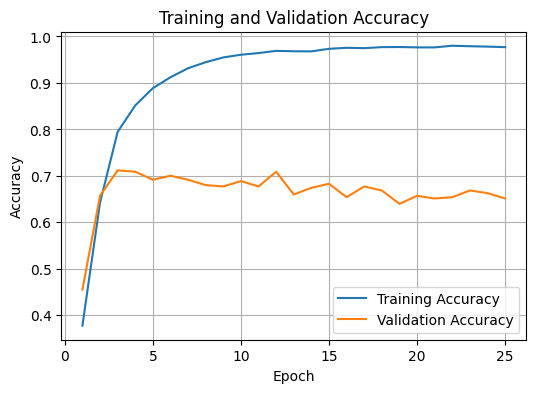

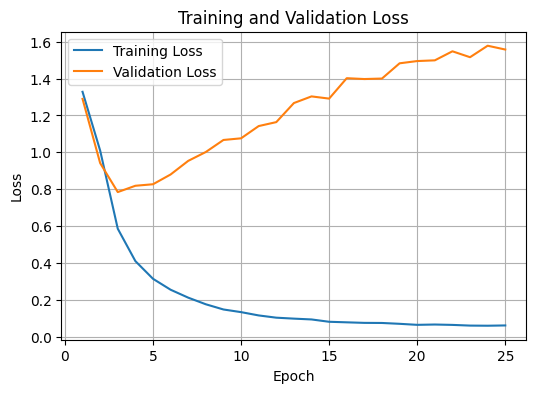

In [179]:
# Answer here
import matplotlib.pyplot as plt

# Assume `history` is your model.fit() result
training_log = history.history
epochs = len(training_log['accuracy'])
x_axis = range(1, epochs+1)

# 1. Plot Training and Validation Accuracy
plt.figure(figsize=(6,4))
plt.plot(x_axis, training_log['accuracy'], label='Training Accuracy')
plt.plot(x_axis, training_log['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 2. Plot Training and Validation Loss
plt.figure(figsize=(6,4))
plt.plot(x_axis, training_log['loss'], label='Training Loss')
plt.plot(x_axis, training_log['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [180]:
#
'''
Training accuracy steadily increases and reaches around 0.97,while validation accuracy stops improving at 0.69 or 0.7.
Training loss continuously decreases, but validation loss starts increasing after a few epochs.
-The training and validation curves indicate overfitting. 
The model performs excellently on training data but does not generalize well to the validation set.
This can be improved using dropout layers, L2 regularization, or early stopping.
'''

'\nTraining accuracy steadily increases and reaches around 0.97,while validation accuracy stops improving at 0.69 or 0.7.\nTraining loss continuously decreases, but validation loss starts increasing after a few epochs.\n-The training and validation curves indicate overfitting. \nThe model performs excellently on training data but does not generalize well to the validation set.\nThis can be improved using dropout layers, L2 regularization, or early stopping.\n'

---

### <a id='toc1_10_6_'></a>[Note](#toc0_)

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### <a id='toc1_10_7_'></a>[More Information for your reference](#toc0_)

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## <a id='toc1_11_'></a>[**7. Word2Vector**](#toc0_)

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

---
### <a id='toc1_11_1_'></a>[**7.1 Prepare training corpus**](#toc0_)

In [181]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
3503,40676,Do not be discouraged by a slowing sales marke...,"[Do, not, be, discouraged, by, a, slowing, sal..."
2139,30135,@LindseySanford @simplymeasured this makes me ...,"[@, LindseySanford, @, simplymeasured, this, m..."
1273,20416,Everyday gay panic is STUNNING: I drew 1 guy's...,"[Everyday, gay, panic, is, STUNNING, :, I, dre..."
1908,21051,Pretty excited for American horror story tonight,"[Pretty, excited, for, American, horror, story..."
2642,30638,@colmjoconnor well it was after my heyday too ...,"[@, colmjoconnor, well, it, was, after, my, he..."


In [182]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['Do', 'not', 'be', 'discouraged', 'by', 'a', 'slowing', 'sales', 'market', '.', 'This', 'will', 'test', 'your', 'business', 'model', 'and', 'pinpoint', '#', 'strengths', 'and', '#', 'weaknesses', '.', "'", '@', 'Ken_Dunn']),
       list(['@', 'LindseySanford', '@', 'simplymeasured', 'this', 'makes', 'me', 'giggle', 'with', 'glee', '!']),
       list(['Everyday', 'gay', 'panic', 'is', 'STUNNING', ':', 'I', 'drew', '1', 'guy', "'s", "att'n", 'to', 'it', 'when', 'he', 'blocked', 'up', 'a', 'toilet', 'stall', "'s", 'cracks', 'w/paper', 'towels', '.', 'TOTAL', 'INCOMPREHENSION', '.'])],
      dtype=object)

---
### <a id='toc1_11_2_'></a>[**7.2 Training our model**](#toc0_)

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [183]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

---
### <a id='toc1_11_3_'></a>[**7.3 Generating word vector (embeddings)**](#toc0_)

In [184]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.11603127,  0.3573685 , -0.39167088,  0.13242231, -0.50910854,
       -0.9476339 ,  0.422908  ,  0.8744934 , -0.24084966, -0.61799395,
       -0.37634048, -0.23007876, -0.54570246, -0.19696322,  0.25498083,
       -0.46610302,  0.35660887, -0.9543542 ,  0.18785305, -1.2630166 ,
        0.6483862 ,  0.57899344,  0.656739  ,  0.24157509,  0.32322493,
        0.19446692, -0.77108216,  0.4285521 , -0.56910837,  0.6047083 ,
       -0.09249985, -0.07031273,  0.5677442 , -0.6014343 ,  0.03789097,
        0.9676781 , -0.10440958, -0.39324155, -0.93723327, -0.12246365,
        0.0229555 , -0.35850844, -0.6162477 , -0.01018787,  1.0193177 ,
       -0.5381022 , -0.7703191 ,  0.3849457 ,  0.8053251 ,  0.4987188 ,
       -0.0544005 , -0.24018164,  0.15760936,  0.05358549, -0.59957707,
        0.03667896,  0.09065171, -0.26695848, -0.17815197,  0.07923879,
        0.05528602,  0.06592911,  0.46334684,  0.15925948, -0.36096248,
        0.92857933,  0.24097405,  0.8227297 , -1.4462143 ,  0.78

In [185]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('birthday', 0.9298157691955566),
 ('help', 0.9232071042060852),
 ('blessed', 0.9161324501037598),
 ('cry', 0.9061557054519653),
 ('smile', 0.9059419631958008),
 ('Be', 0.9052675366401672),
 ('kinda', 0.9049859642982483),
 ('cats', 0.9042357206344604),
 ("'be", 0.9010036587715149),
 ('right', 0.9008156657218933)]

---
### <a id='toc1_11_4_'></a>[**7.4 Using a pre-trained w2v model**](#toc0_)

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### <a id='toc1_11_4_1_'></a>[(1) Download model by yourself](#toc0_)

Download from this link: [Kaggle | Google News Vectors](https://www.kaggle.com/datasets/didiersalazar/google-news-vectors)

Copy the data `GoogleNews-vectors-negative300.bin` into the following folder directory: `GoogleNews/`

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [186]:
from gensim.models import KeyedVectors
# IMPORTANT: Please make sure that you have correctly downloaded the file and put it in the correct directory
## Note: this model is huge, this will take some time ...
model_path = "./GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### <a id='toc1_11_4_2_'></a>[(2) Using gensim api](#toc0_)

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [187]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

---
### <a id='toc1_11_5_'></a>[**7.5 king + woman - man = ?**](#toc0_)

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [188]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
##### <a id='toc1_11_5_1_1_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [189]:
import gensim.downloader as api
model = api.load("word2vec-google-news-300")
print("Model loaded successfully")
print(model.most_similar("happy"))

Model loaded successfully
[('glad', 0.7408890724182129), ('pleased', 0.6632170677185059), ('ecstatic', 0.6626912355422974), ('overjoyed', 0.6599286794662476), ('thrilled', 0.6514049172401428), ('satisfied', 0.6437949538230896), ('proud', 0.636042058467865), ('delighted', 0.627237856388092), ('disappointed', 0.6269949674606323), ('excited', 0.6247665286064148)]


In [190]:
from keras.models import Sequential
#i make sure path is correct)
w2v = KeyedVectors.load_word2vec_format("./GoogleNews/GoogleNews-vectors-negative300.bin", binary=True)

# Tokenize text
train_df['text_tok'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x.lower()))
test_df['text_tok'] = test_df['text'].apply(lambda x: nltk.word_tokenize(x.lower()))

# Sentence to average vector
def sent_vec(tokens):
    vecs = [w2v[w] for w in tokens if w in w2v]
    return np.mean(vecs, axis=0) if vecs else np.zeros(300)

X_train = np.vstack(train_df['text_tok'].apply(sent_vec))
X_test = np.vstack(test_df['text_tok'].apply(sent_vec))

# Encode labels
le = LabelEncoder()
y_train = keras.utils.to_categorical(le.fit_transform(train_df['emotion']))
y_test = keras.utils.to_categorical(le.transform(test_df['emotion']))

# Simple neural net
model = Sequential([
    Dense(64, activation='relu', input_shape=(300,)),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate
loss, acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", round(acc, 2))

Epoch 1/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.4016 - loss: 1.2854 - val_accuracy: 0.4438 - val_loss: 1.1730
Epoch 2/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5823 - loss: 1.0260 - val_accuracy: 0.6427 - val_loss: 0.9510
Epoch 3/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6834 - loss: 0.8441 - val_accuracy: 0.6744 - val_loss: 0.8750
Epoch 4/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7169 - loss: 0.7479 - val_accuracy: 0.7147 - val_loss: 0.7892
Epoch 5/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7335 - loss: 0.6982 - val_accuracy: 0.6599 - val_loss: 0.7954
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6599 - loss: 0.7954 
Test Accuracy: 0.66


---
## <a id='toc1_12_'></a>[**8. Clustering: k-means**](#toc0_)

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### <a id='toc1_12_1_1_'></a>[Basic concept](#toc0_)

![pic5.png](./pics/pic5.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [191]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [192]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![pic6.png](./pics/pic6.png)

In [193]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])

In [194]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])

---
## <a id='toc1_13_'></a>[**9. High-dimension Visualization: t-SNE and UMAP**](#toc0_)

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](./pics/pic7.png)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

And also like this for UMAP:

![pic9.png](./pics/pic9.png)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 
https://umap-learn.readthedocs.io/en/latest/

---
### <a id='toc1_13_1_'></a>[**9.1 Prepare visualizing target**](#toc0_)

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [195]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


---
### <a id='toc1_13_2_'></a>[**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc0_)

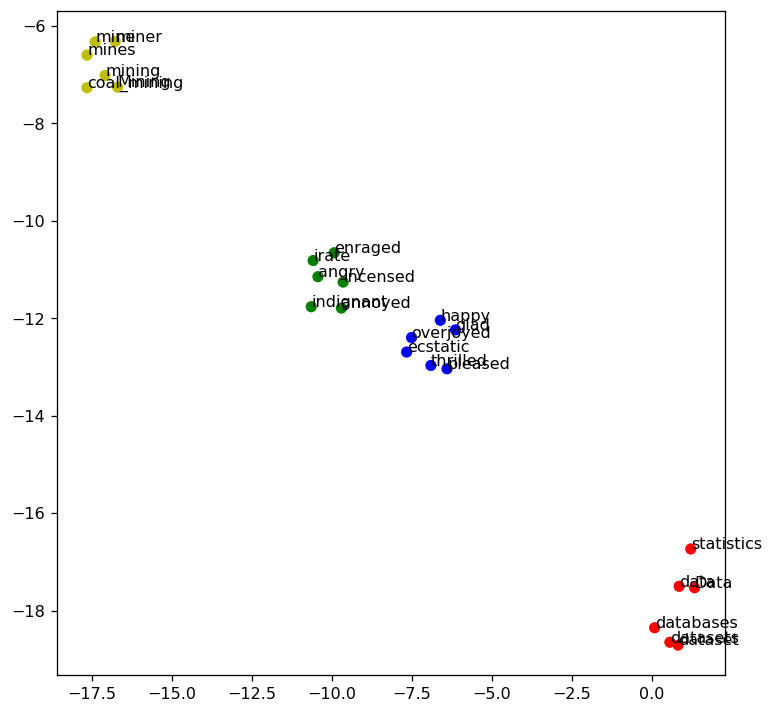

In [196]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

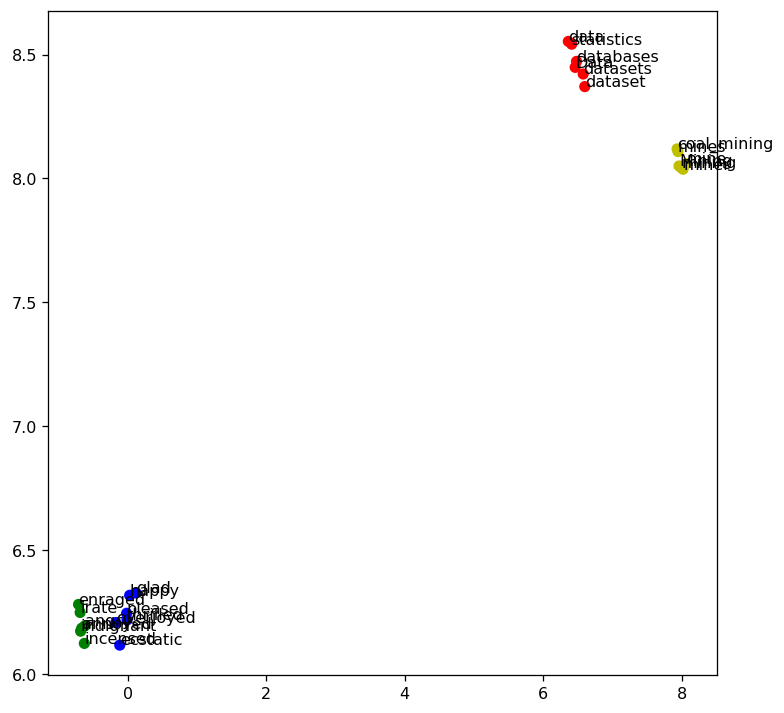

In [197]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## preparing training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()





##### <a id='toc1_11_5_1_1_'></a>[**>>> Exercise 8 (Take home):**](#toc0_)

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

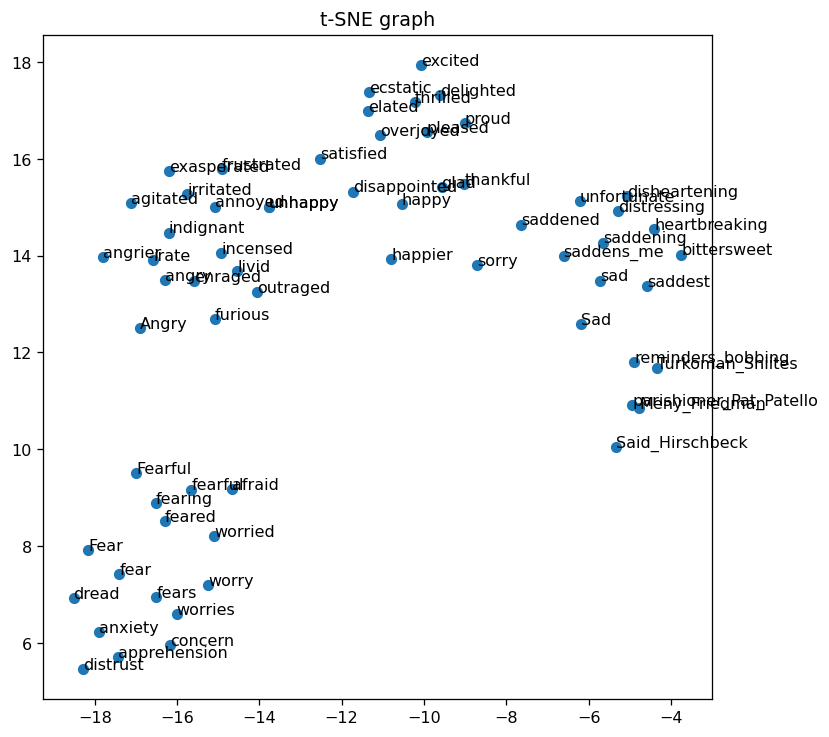

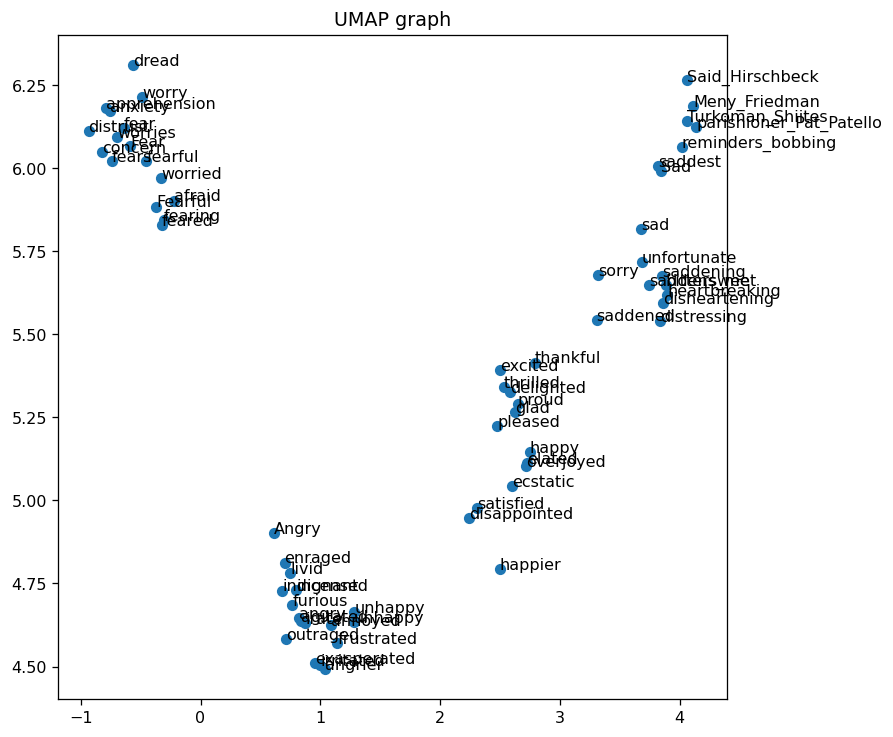

In [198]:
# Answer here
from sklearn.manifold import TSNE
import umap.umap_ as umap

#efining target words for each emotion
topn = 15
happy_words = ['happy'] + [w for w,_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [w for w,_ in w2v_google_model.most_similar('angry', topn=topn)]
sad_words   = ['sad']   + [w for w,_ in w2v_google_model.most_similar('sad', topn=topn)]
fear_words  = ['fear']  + [w for w,_ in w2v_google_model.most_similar('fear', topn=topn)]

target_words = happy_words + angry_words + sad_words + fear_words

#Prepare word vectors
size = 200
all_words = list(w2v_google_model.index_to_key)
word_train = target_words + all_words[:size]
X_train = w2v_google_model[word_train]

#t-SNE
tsne = TSNE(n_components=2, metric='cosine', random_state=28)
X_tsne = tsne.fit_transform(X_train)

#Plot t-SNE
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:len(target_words),0], X_tsne[:len(target_words),1])
for label, x, y in zip(target_words, X_tsne[:len(target_words),0], X_tsne[:len(target_words),1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0), textcoords='offset points')
plt.title("t-SNE graph")
plt.show()

#UMAP
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)
X_umap = umap_model.fit_transform(X_train)

#Plot UMAP
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:len(target_words),0], X_umap[:len(target_words),1])
for label, x, y in zip(target_words, X_umap[:len(target_words),0], X_umap[:len(target_words),1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0), textcoords='offset points')
plt.title("UMAP graph")
plt.show()

In [199]:
'''
#T-SNE

-Clusters words tightly according to semantic similarity.

-Has more Breathing space between clusters, making it easy to visually separate emotion groups.

-Good at showing local relationships (similar words together), but distances between distant clusters may not be meaningful.

#UMAP

-Clusters tend to be more elongated or stick-like.

-Preserves some global structure better than t-SNE.

-Less visually neat for dense annotation; overlapping may occur if many words are close.
'''

'\n#T-SNE\n\n-Clusters words tightly according to semantic similarity.\n\n-Has more Breathing space between clusters, making it easy to visually separate emotion groups.\n\n-Good at showing local relationships (similar words together), but distances between distant clusters may not be meaningful.\n\n#UMAP\n\n-Clusters tend to be more elongated or stick-like.\n\n-Preserves some global structure better than t-SNE.\n\n-Less visually neat for dense annotation; overlapping may occur if many words are close.\n'

---